<a href="https://colab.research.google.com/github/bharath967/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from datetime import date

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Almabetter/Seoul Bike Sharing Demand Prediction-BHarath Kumar A/SeoulBikeData.csv',encoding='ISO-8859-1')

In [4]:
data.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
data.rename(columns={'Visibility (10m)' :'Visibility','Solar Radiation (MJ/m2)' :'Solar Radiation', 'Dew point temperature(°C)':'Dew point temperature', 'Wind speed (m/s)':'Wind speed', 
                     'Humidity(%)':'Humidity', 'Temperature(°C)':'Temperature'}, inplace = True)

In [7]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
data.shape

(8760, 14)

In [9]:
data.describe()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall(mm)           8760 non-null   float64
 10  Snowfall (cm)          8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [12]:
data.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall(mm)             0
Snowfall (cm)            0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

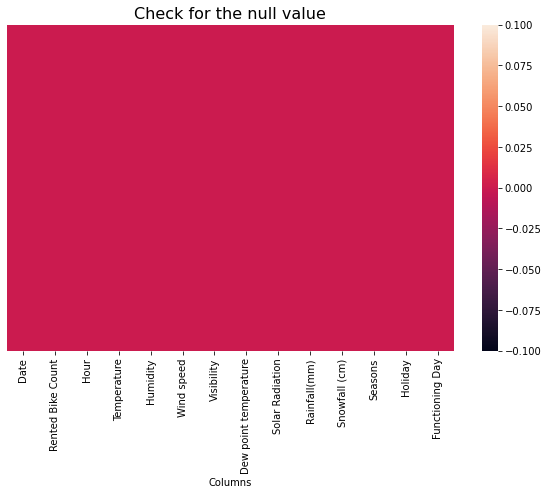

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), yticklabels=False)
plt.title('Check for the null value', size=16)
plt.xlabel('Columns', size=10)
plt.show()

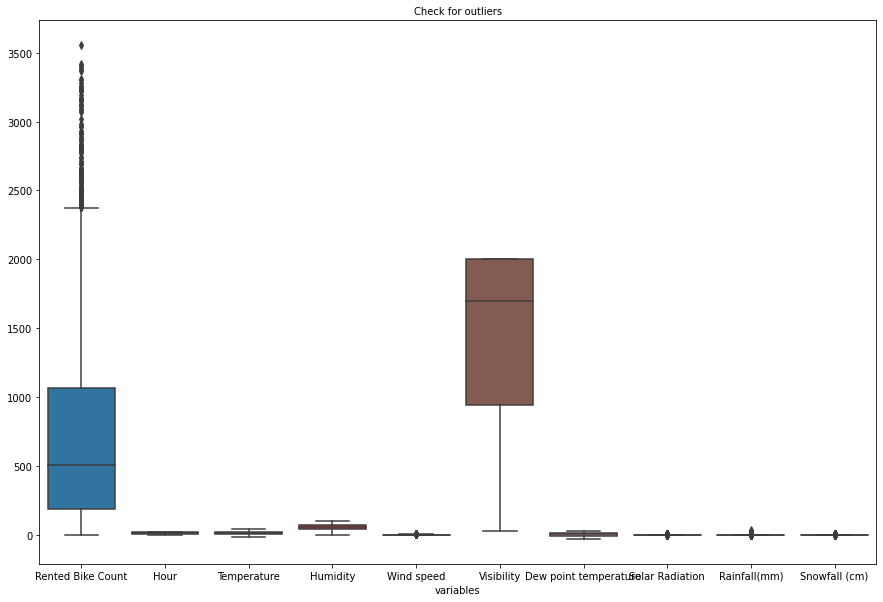

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data)
plt.title('Check for outliers', size=10)
plt.xlabel('variables', size=10)
plt.show()

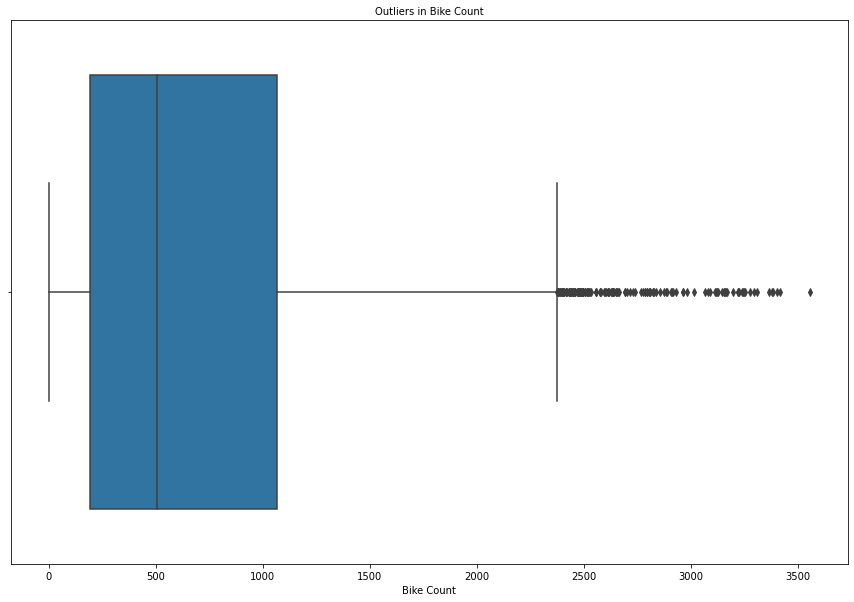

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='Rented Bike Count',)
plt.title('Outliers in Bike Count', size=10)
plt.xlabel('Bike Count', size=10)
plt.show()

In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_name'] = data['Date'].dt.day_name()

In [17]:
data.head(5)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_name
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday


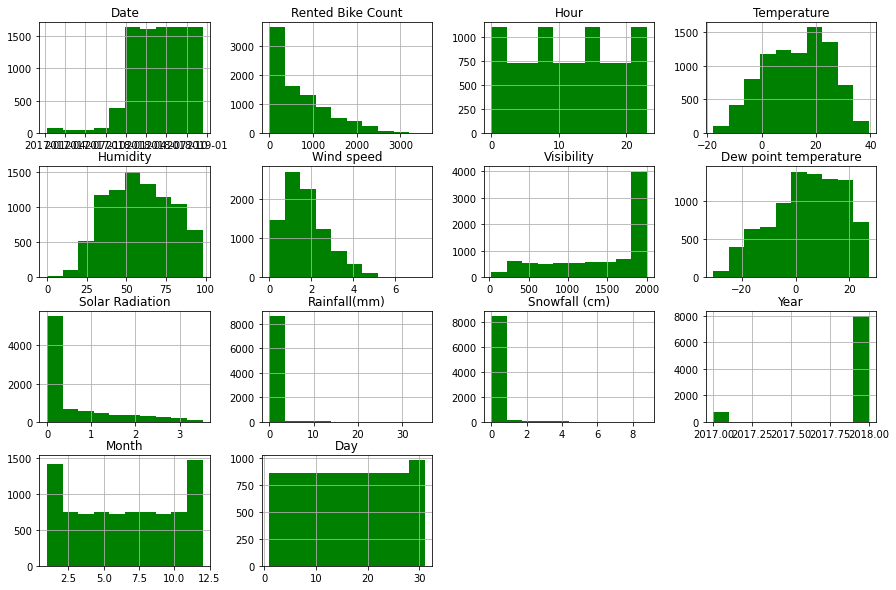

In [18]:
data.hist(figsize=(15,10),color='g')
plt.show()

Text(0.5, 1.0, 'Correlation between different variables')

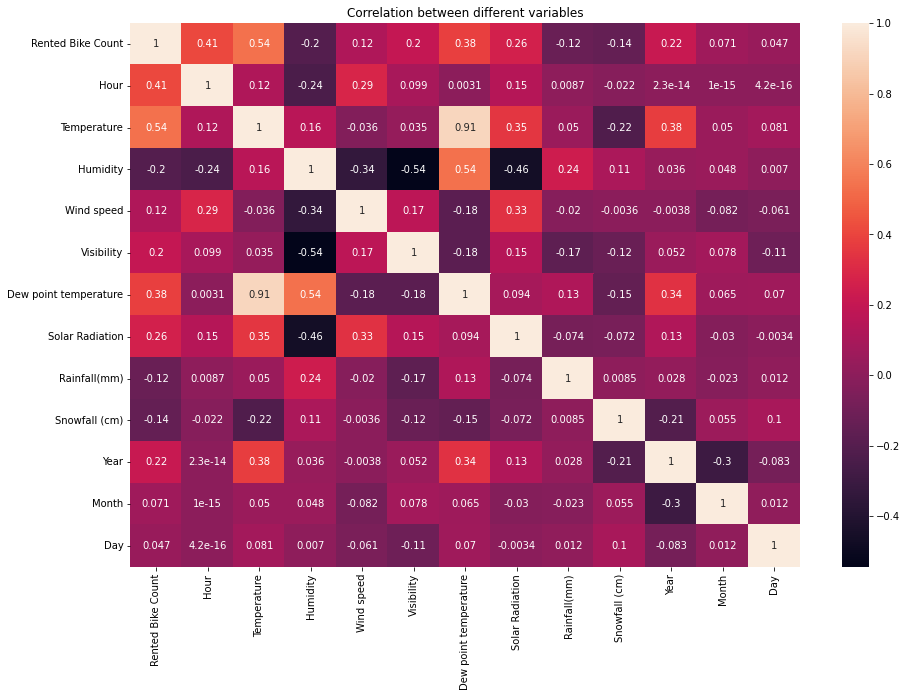

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation between different variables')

analysing the dependent variable

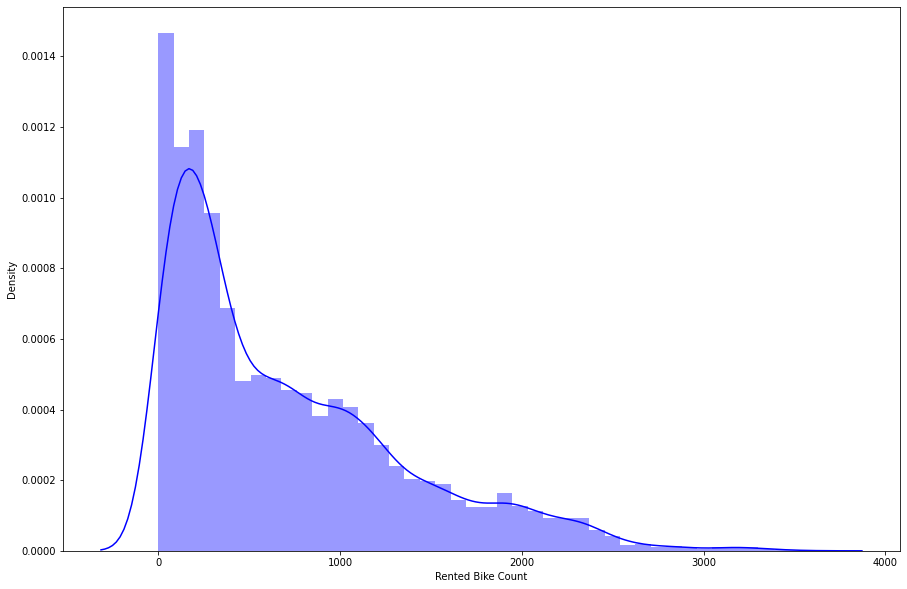

In [20]:
plt.figure(figsize=(15,10))
sns.distplot(data['Rented Bike Count'],color='b')

In [21]:
print("skewness is: %f" % data['Rented Bike Count'].skew())
print("kurtosis is: %f" % data['Rented Bike Count'].kurt())

skewness is: 1.153428
kurtosis is: 0.853387


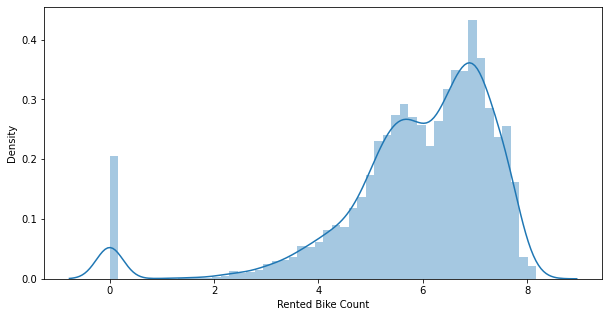

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(np.log1p(data['Rented Bike Count']))

In [23]:

np.log1p(data['Rented Bike Count']).skew()


-1.8321986426412804

In [24]:
np.log1p(data['Rented Bike Count']).kurt()

4.338716490707816

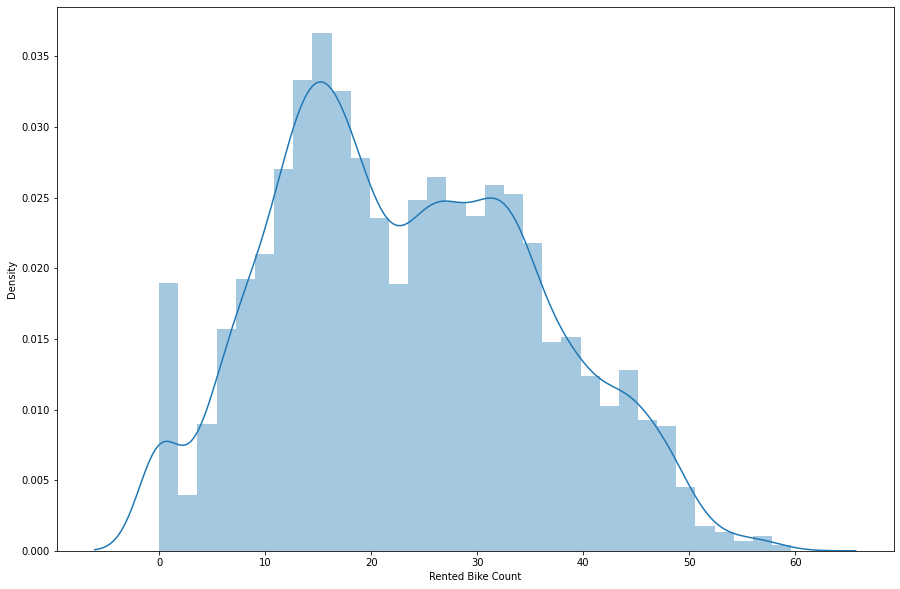

In [25]:
plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(data['Rented Bike Count']))

In [26]:
np.sqrt(data['Rented Bike Count']).skew()

0.237362090985412

In [27]:
numeric_features=data.columns

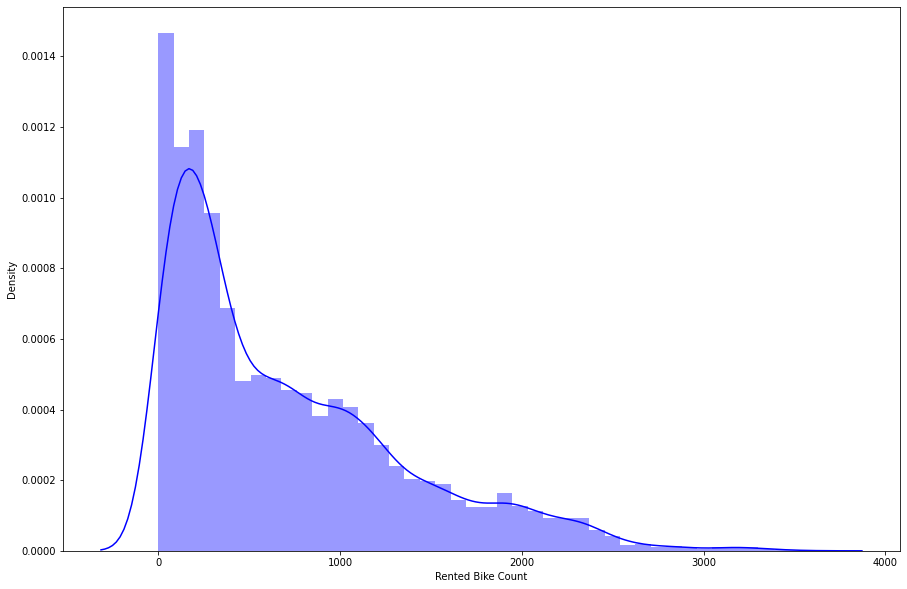

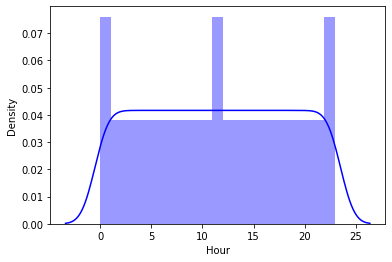

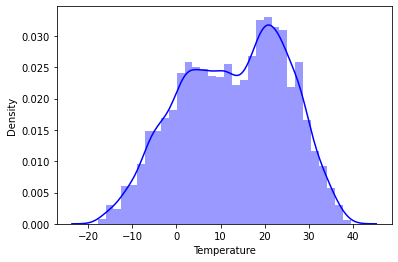

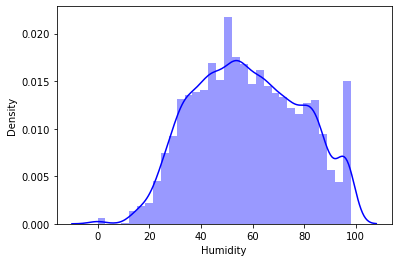

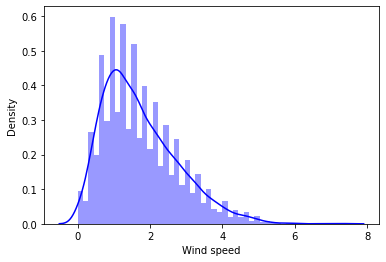

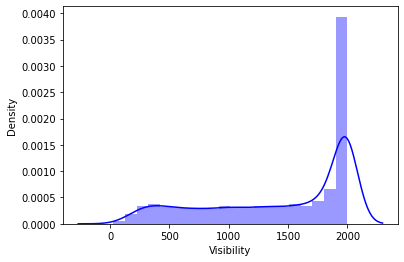

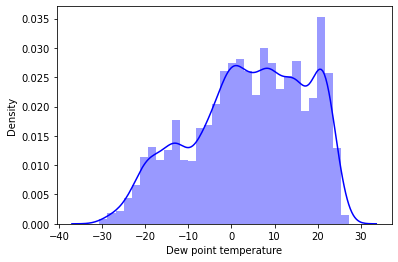

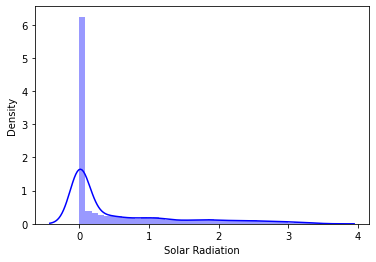

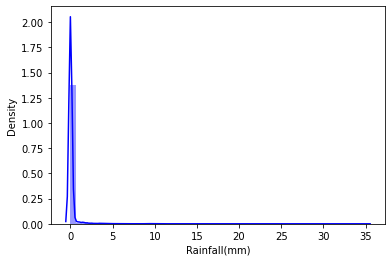

In [28]:
#Checking the distribution of all the Independent variables
plt.figure(figsize=(15,10))
for i in numeric_features[1:10]:
  sns.distplot(data[i],color='b')
  plt.show()

right skewed=rainfall,solar radiation,wind speed
left skewed= dew point temp, visibility, humidity

Analysing the independent vvariables


In [29]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Year', 'Month', 'Day', 'Day_name'],
      dtype='object')

In [30]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Year', 'Month', 'Day', 'Day_name'],
      dtype='object')

In [31]:
independent_variables = ['Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Solar Radiation', 'Rainfall(mm)', 'Snowfall (cm)']
categorical_variables = ['Hour','Seasons', 'Holiday', 'Functioning Day', 'Month', 'Day', 'Day_name']
dependent_variable=['Rented Bike Count']

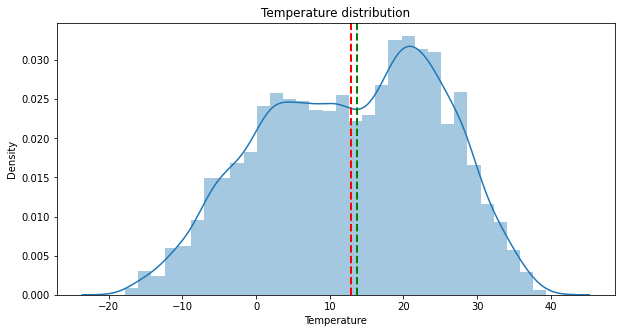

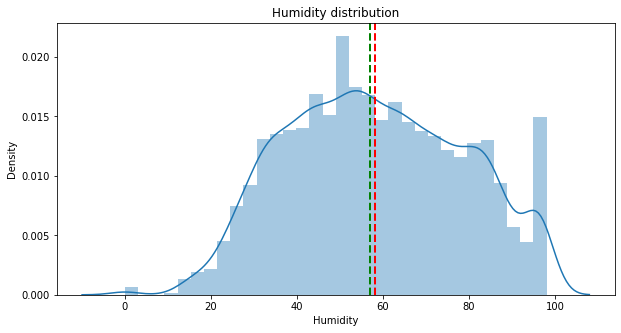

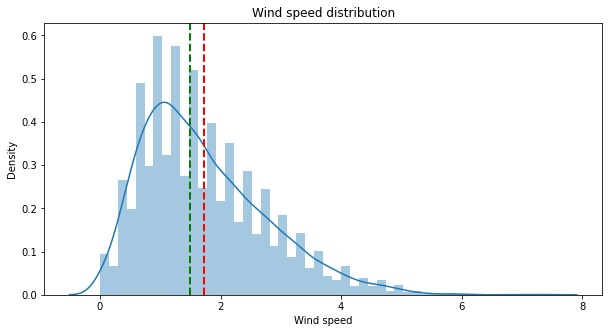

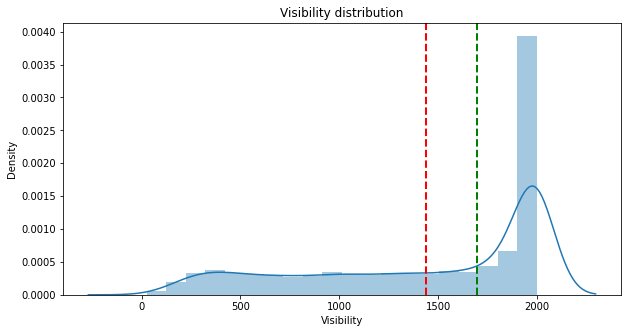

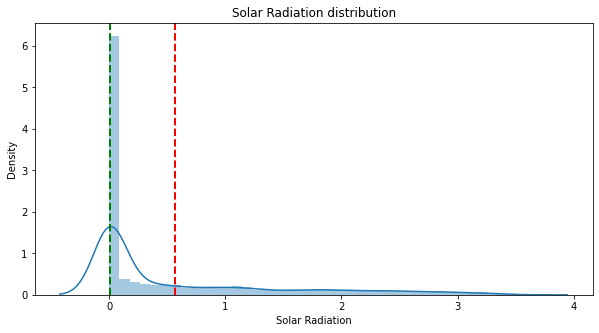

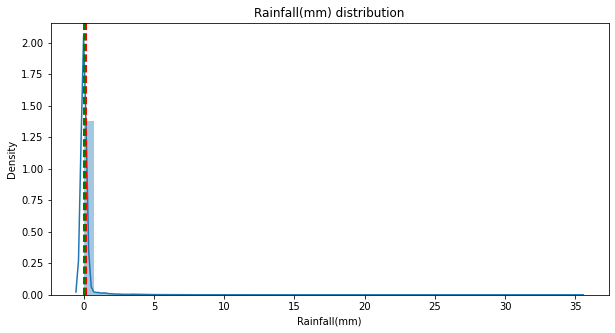

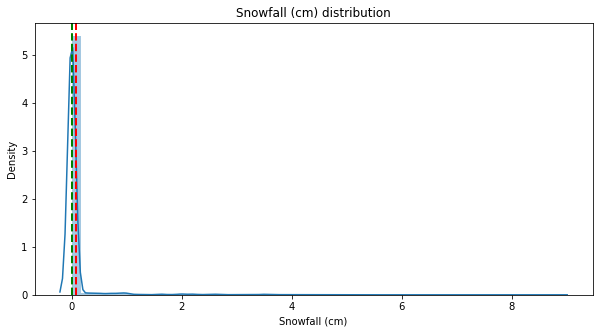

In [32]:
for i in independent_variables:
  plt.figure(figsize=(10,5))
  sns.distplot(data[i])
  plt.axvline(data[i].mean(), color='red', linestyle='dashed', linewidth=2)
  plt.axvline(data[i].median(), color='green', linestyle='dashed', linewidth=2)
  plt.title(i+' distribution')
  plt.show()

Analyzing the relationship between the dependent variable and the independent variables

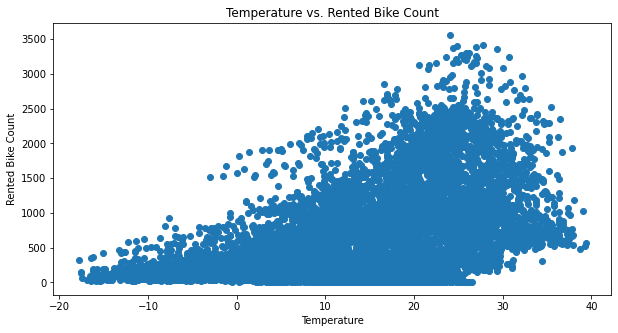

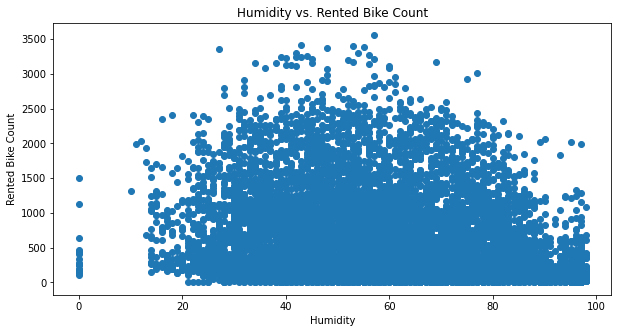

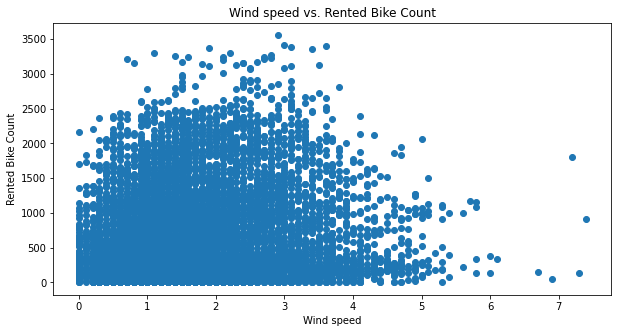

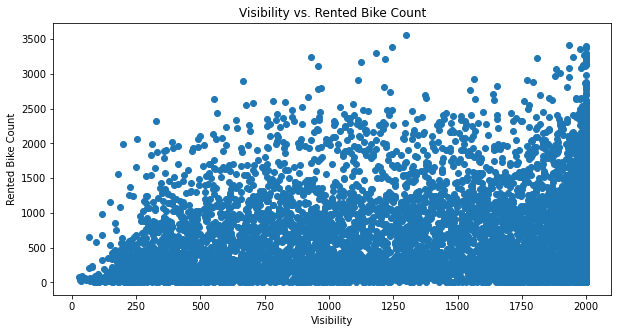

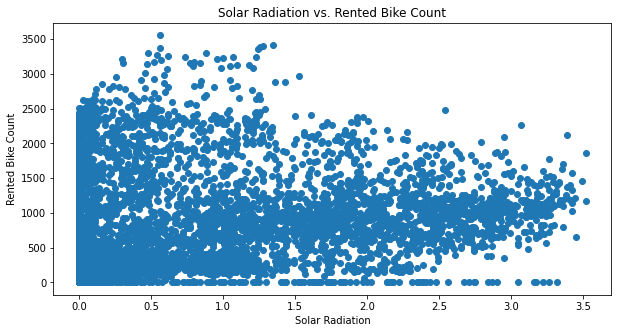

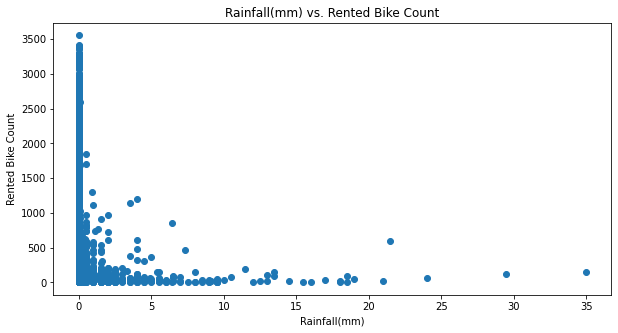

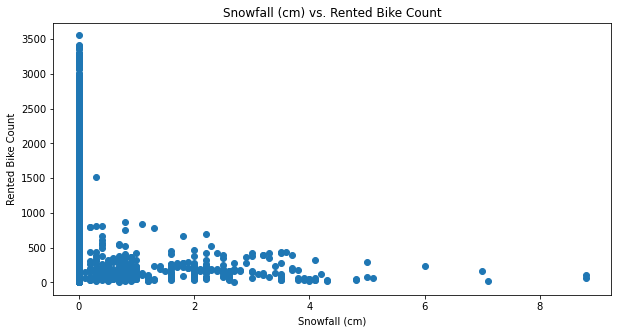

In [33]:
# Analyzing the relationship between the dependent variable and the continuous variables
for i in independent_variables:
  plt.figure(figsize=(10,5))
  plt.scatter(x=i,y=dependent_variable[0],data=data)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs. '+ dependent_variable[0])
  plt.show()

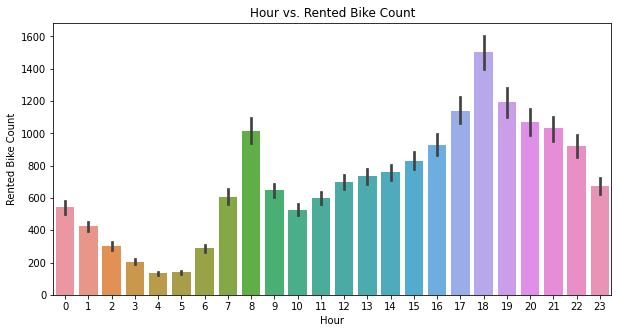

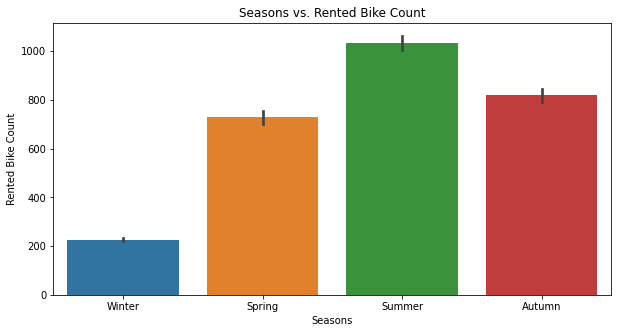

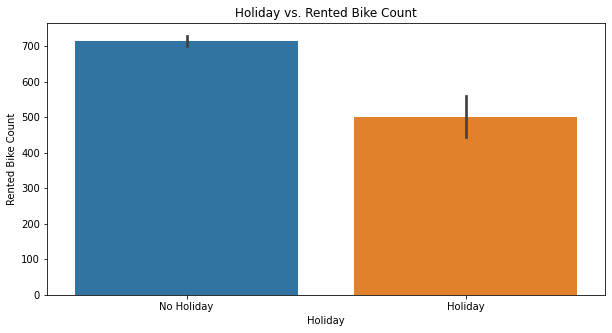

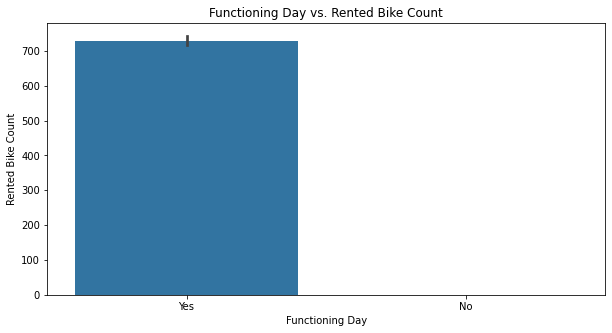

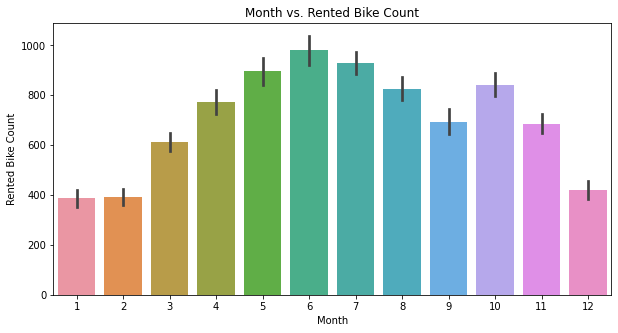

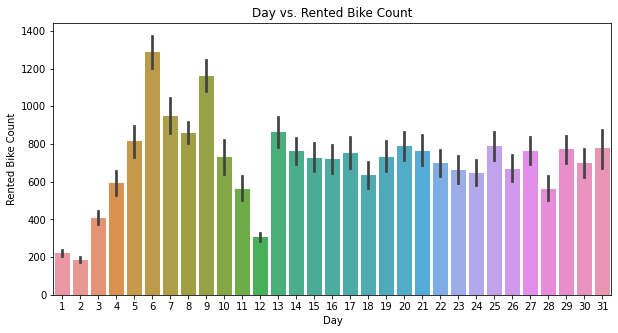

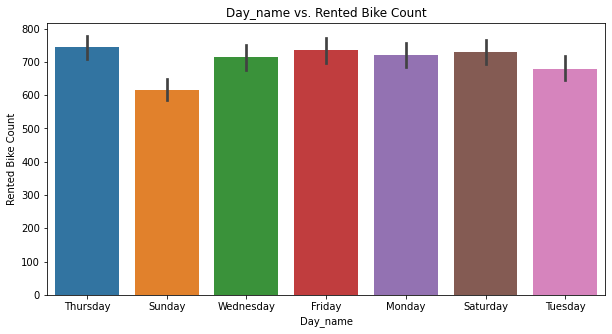

In [34]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in categorical_variables:
  plt.figure(figsize=(10,5))
  sns.barplot(x=i,y=dependent_variable[0],data=data)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs. '+ dependent_variable[0])
  plt.show()

In [35]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Year', 'Month', 'Day', 'Day_name'],
      dtype='object')

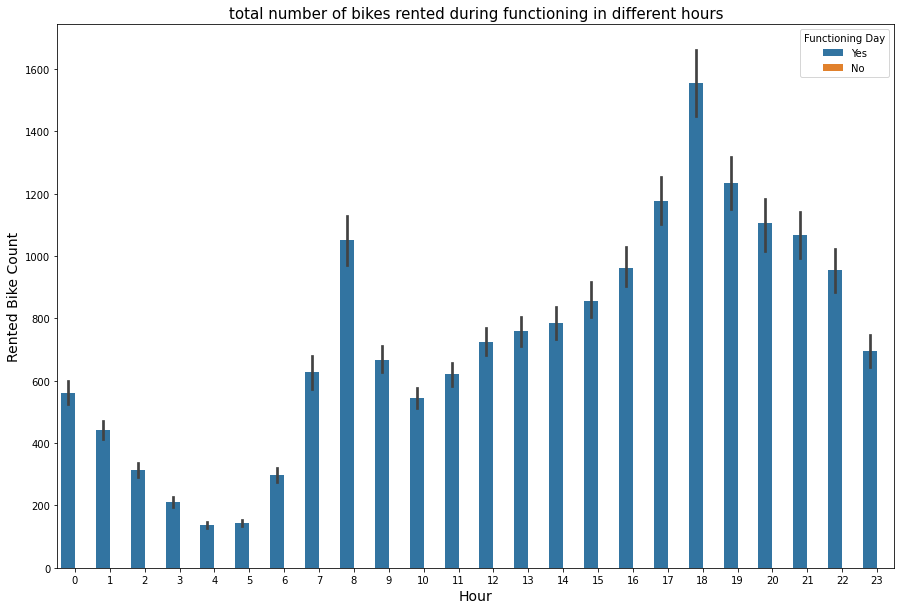

In [43]:
#Functioning day value counts
plt.figure(figsize=(15,10))
sns.barplot(x='Hour', hue='Functioning Day', y='Rented Bike Count', data=data)
plt.title("total number of bikes rented during functioning in different hours", size=15)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

In [44]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

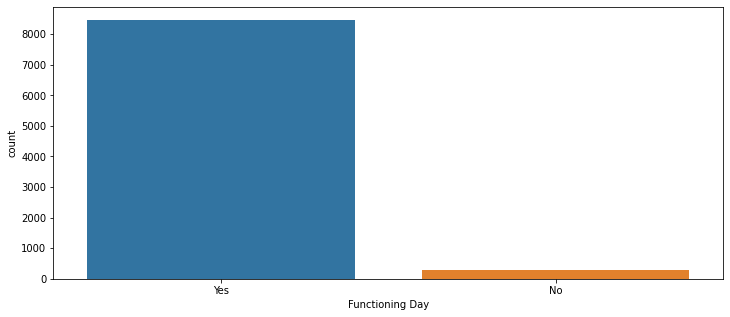

In [37]:
plt.figure(figsize=(12, 5))
ch = sns.countplot(data['Functioning Day'])

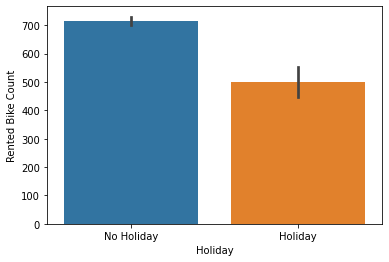

In [46]:
#Analysing Rented Bike Count when there was holiday or not.
sns.barplot(x=data['Holiday'],y=data['Rented Bike Count'],data=data)

In [38]:
independent_variables = ['Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Solar Radiation', 'Rainfall(mm)', 'Snowfall (cm)']
categorical_variables = ['Hour','Seasons', 'Holiday', 'Functioning Day', 'Month', 'Day', 'Day_name']
dependent_variable=['Rented Bike Count']

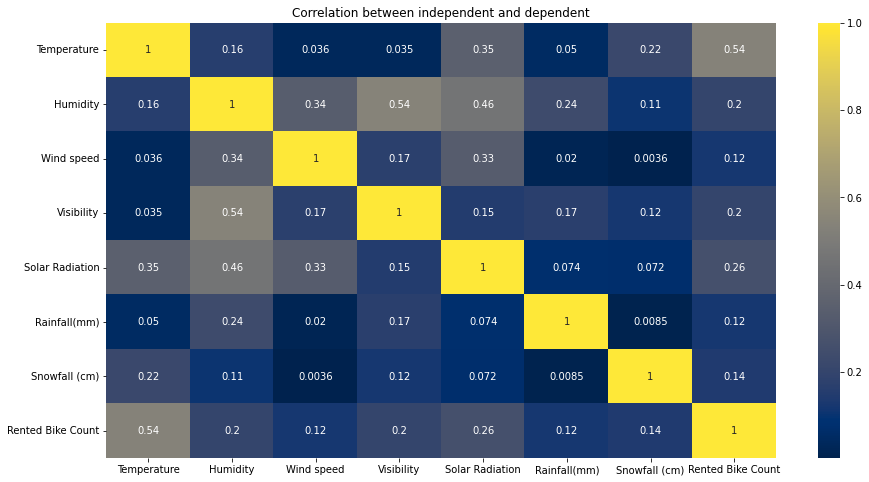

In [39]:
 #Correlation magnitude for continuous variables
plt.figure(figsize=(15,8))
plt.title('Correlation between independent and dependent')
correlation = data[independent_variables+dependent_variable].corr()
sns.heatmap(abs(correlation), annot=True, cmap='cividis')

In [40]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Year', 'Month', 'Day', 'Day_name'],
      dtype='object')

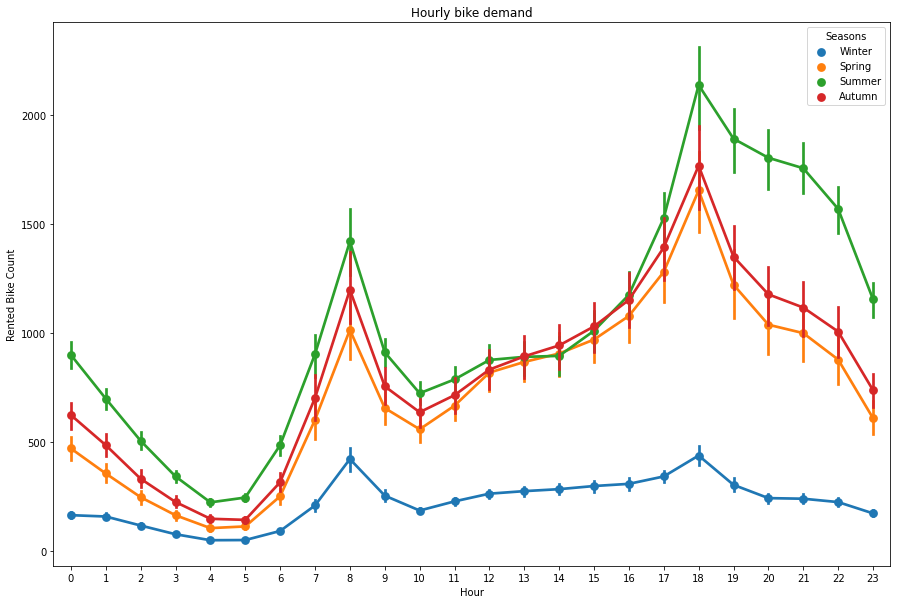

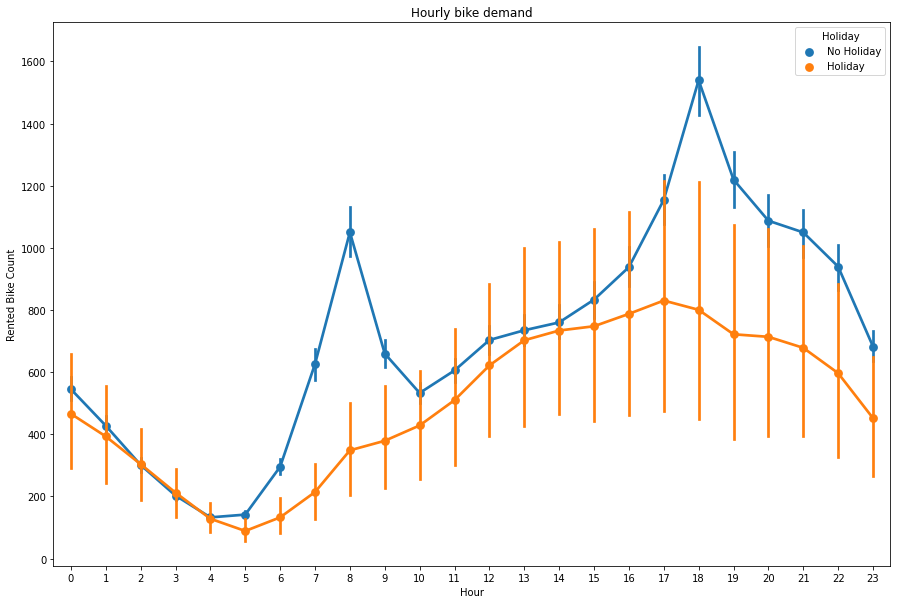

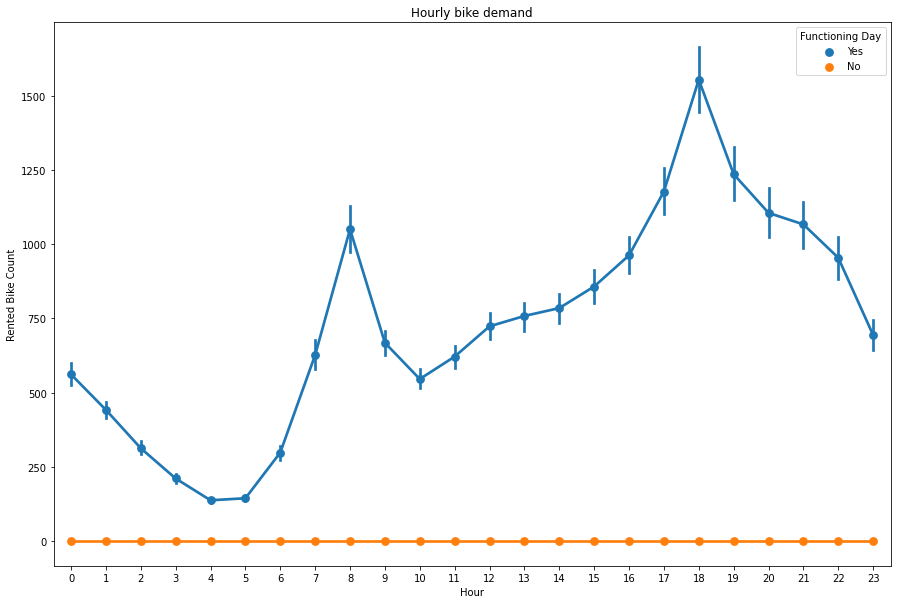

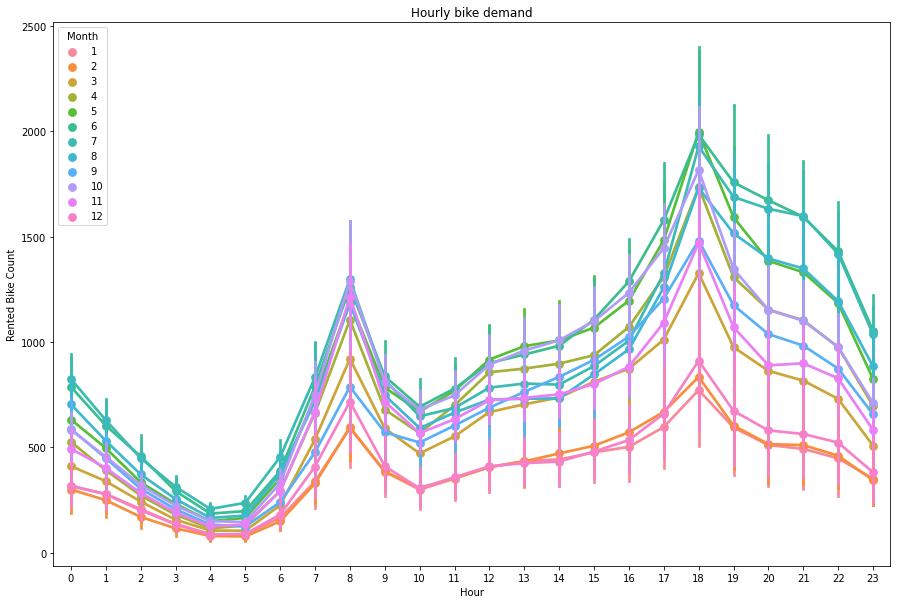

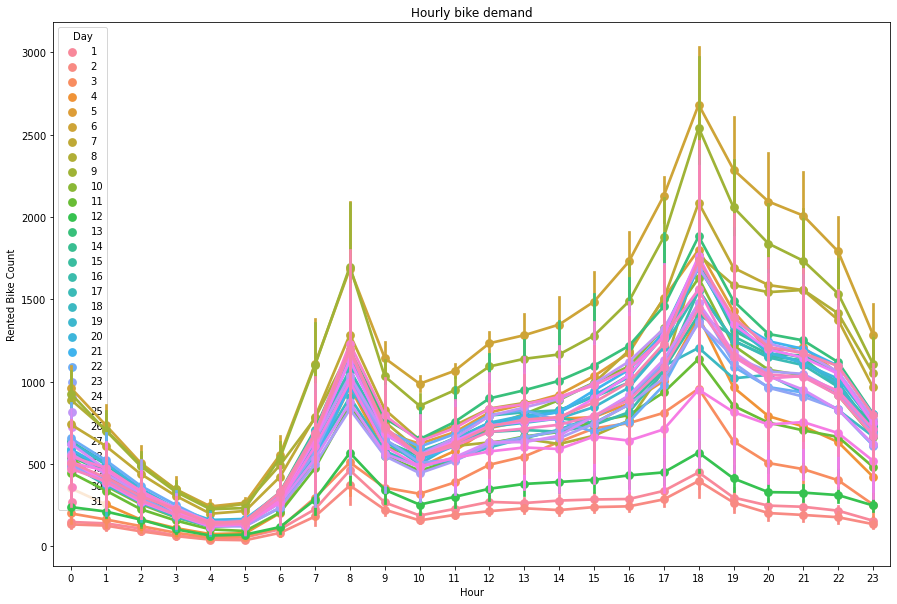

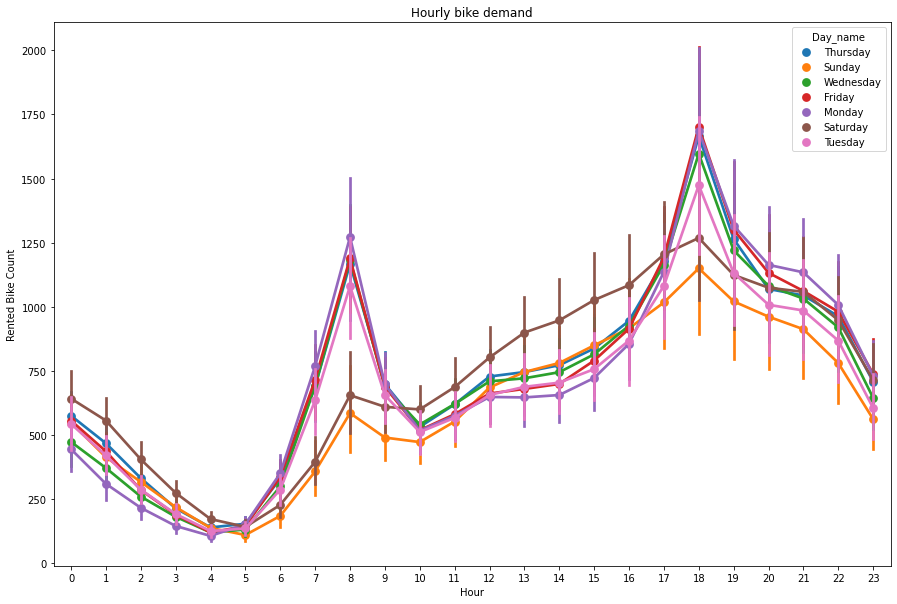

In [41]:
for i in categorical_variables:
  if i == 'Hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(15,10))
    sns.pointplot(data=data, x='Hour', y='Rented Bike Count', hue=i, ax=ax)
    plt.title('Hourly bike demand')
    plt.show

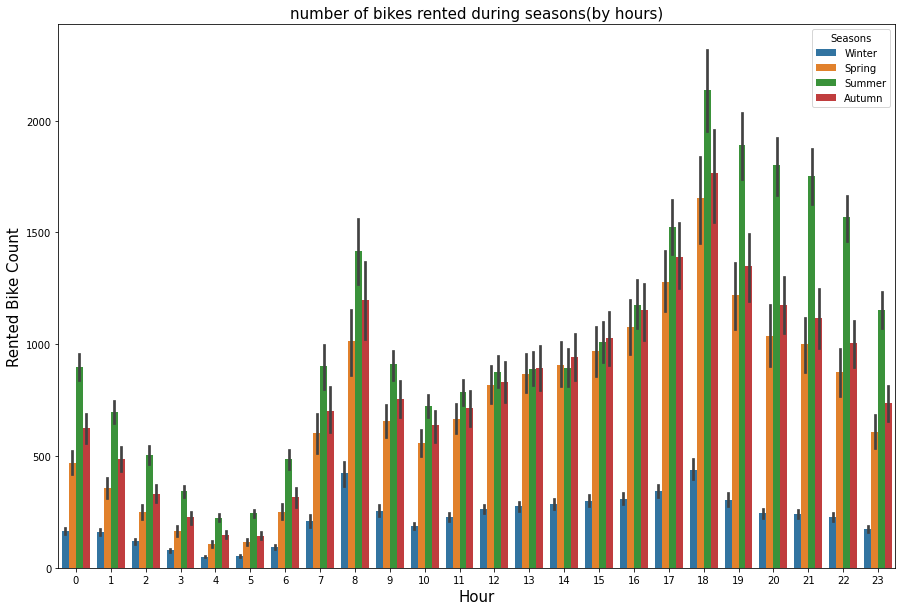

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=data)
plt.title("number of bikes rented during seasons(by hours)", size=15)
plt.xlabel("Hour", size=15)
plt.ylabel("Rented Bike Count", size=15)
plt.show()

In [52]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Year', 'Month', 'Day', 'Day_name'],
      dtype='object')

In [57]:
df = pd.get_dummies(data, columns = ['Month', 'Hour','Day'])

In [61]:
df.columns

Index(['Date', 'Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Year',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Day_1', 'Day_2',
       'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8', 'Day_9', 'Day_10',
       'Day_11', 'Day_12', 'Day_13', 'Day_14', 'Day_15', 'Day_16', 'Day_17',
       'Day_18', 'Day_19', 'Day_20', 'Day_21', 'Day_22', 'Day_23', 'Day_24',
       'Day_25', 'Day_26', 'Day_27', 'Day_28', 'Day_29', 'Day_30', 'Day_31'],
      dtype='object

In [60]:
# dropping seasons and weekend
df.drop(['Seasons','Day_name'],axis=1, inplace=True)

In [62]:
df.head()

,Date,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall(mm),Snowfall (cm),...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,2017-01-12,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-12,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-12,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-12,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-12,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df['Functioning Day'] = np.where(df['Functioning Day'] == 'Yes',1,0)
df['Holiday'] = np.where(df['Holiday'] == 'Holiday', 1,0)

In [66]:
df.drop('Date',axis=1,inplace=True)

In [68]:
X = df.drop('Rented Bike Count',axis=1)
y = np.sqrt(df[dependent_variable])

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from prettytable import PrettyTable

%matplotlib inline

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [74]:
#X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7008, 78)
(1752, 78)
(7008, 1)
(1752, 1)


In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
#Creating the Linear regression object
regressor = LinearRegression()
#Train the model using the training set
regressor.fit(X_train, y_train)

LinearRegression()

In [78]:
#linear regression score
regressor.score(X_train, y_train)

0.7662583679177041

In [79]:
pred_train = regressor.predict(X_train)

In [80]:
pred_test = regressor.predict(X_test)


In [81]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 36.07407597343594
RMSE= 6.006169825557378
R2_Score= 0.7662583679177041


In [82]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 36.1545393574136
RMSE= 6.01286448852904
R2_Score= 0.7704273375633086


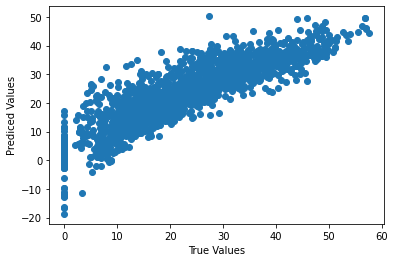

In [85]:
plt.scatter(y_test,pred_test)
plt.xlabel('True Values'), plt.ylabel('Prediced Values')
plt.show()

In [91]:
e_linear = y_test - pred_test 

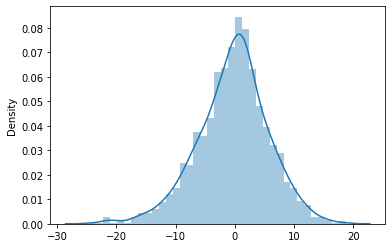

In [92]:
sns.distplot(e_linear)
plt.show()

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
#implementing the model
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=12)
#training the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=12)

In [97]:
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

In [98]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 2.1792057246604006
RMSE= 1.476213305948839
R2_Score= 0.9858798572387469


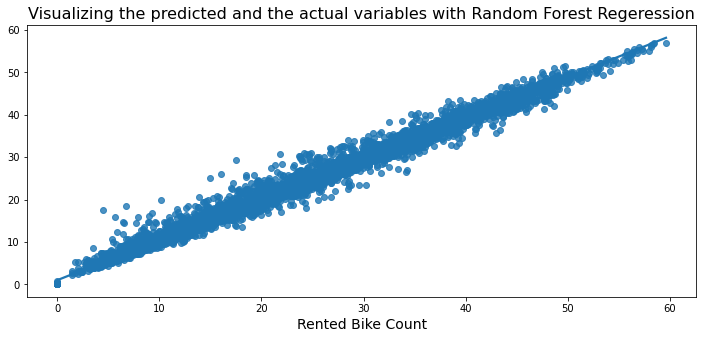

In [99]:
plt.figure(figsize=(12, 5))
sns.regplot(y_train, pred_train)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

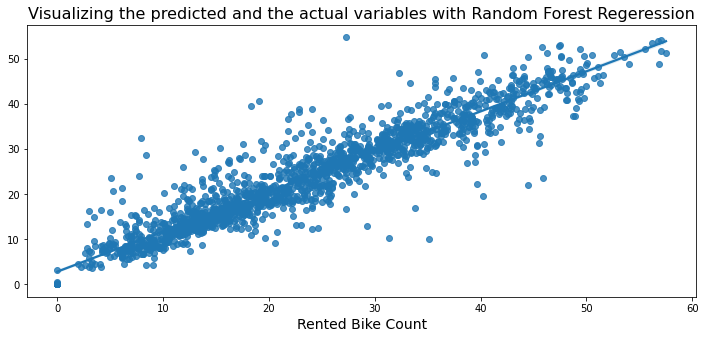

In [100]:
plt.figure(figsize=(12, 5))
sns.regplot(y_test, pred_test)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()